# Neural Network

## Setup

### Run the Data Preprocessing notebook once to import the get_data method

In [9]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [10]:
%run data_evaluation.ipynb

### Imports

In [11]:
import numpy as np
import pandas as pd

from keras import regularizers
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout    
from keras.callbacks import EarlyStopping

### Hyperparmeters

In [12]:
# for get_data
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.8, 0.05, 0.15)

### Get the data

In [13]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 86 rows -> height to low.
Dropped 1 rows -> height to high.
Dropped 2 rows -> weight to low.
Dropped 0 rows -> weight to high.
Dropped 186 rows -> systolic bp to low.
Dropped 47 rows -> systolic bp to high.
Dropped 40 rows -> diastolic bp to low.
Dropped 948 rows -> diastolic bp to high.
Dropped 103 rows -> sytolic bp was lower than diastolic.


## Model

### Create the model

In [14]:
classifier = Sequential()

classifier.add(Dense(x_train.shape[1], activation='tanh', input_shape=(x_train.shape[1],)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [15]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training vs Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

Epoch 1/100
429/429 [==============================] - 4s 8ms/step - loss: 0.5839 - accuracy: 0.6960 - val_loss: 0.5480 - val_accuracy: 0.7342
Epoch 2/100
429/429 [==============================] - 3s 8ms/step - loss: 0.5559 - accuracy: 0.7254 - val_loss: 0.5441 - val_accuracy: 0.7361
Epoch 3/100
429/429 [==============================] - 3s 8ms/step - loss: 0.5552 - accuracy: 0.7249 - val_loss: 0.5466 - val_accuracy: 0.7301
Epoch 4/100
429/429 [==============================] - 3s 8ms/step - loss: 0.5528 - accuracy: 0.7270 - val_loss: 0.5481 - val_accuracy: 0.7301
Epoch 5/100
429/429 [==============================] - 3s 8ms/step - loss: 0.5514 - accuracy: 0.7271 - val_loss: 0.5424 - val_accuracy: 0.7339
Epoch 6/100
429/429 [==============================] - 3s 8ms/step - loss: 0.5515 - accuracy: 0.7280 - val_loss: 0.5406 - val_accuracy: 0.7363
Epoch 7/100
429/429 [==============================] - 3s 8ms/step - loss: 0.5516 - accuracy: 0.7273 - val_loss: 0.5460 - val_accuracy: 0.7353

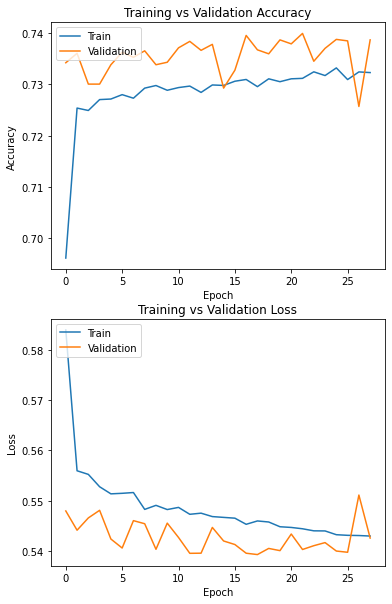

"\nx_train = x_train\ny_train = y_train\n\nfrom sklearn.model_selection import KFold\nkf = KFold(n_splits=5, random_state=42, shuffle = True)\nfor train_index, test_index in kf.split(x_train):\n    x_fold_train, x_fold_val = x_train.iloc[train_index], x_train.iloc[test_index]\n    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]\n    \n    history = classifier.fit(\n        x_fold_train.astype('float32'),\n        y_fold_train.astype('float32'),\n        batch_size=64,\n        epochs=10,\n        validation_data=(x_fold_val.astype('float32'), y_fold_val.astype('float32'))\n    )\n    \n    plot_hist(history.history)\n    \n"

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = classifier.fit(
    x_train.astype('float32'),
    y_train.astype('float32'),
    batch_size=128,
    epochs=100,
    validation_data=(x_val.astype('float32'), y_val.astype('float32')),
    callbacks=[early_stop]
)

plot_hist(history.history)

"""
x_train = x_train
y_train = y_train

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle = True)
for train_index, test_index in kf.split(x_train):
    x_fold_train, x_fold_val = x_train.iloc[train_index], x_train.iloc[test_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
    history = classifier.fit(
        x_fold_train.astype('float32'),
        y_fold_train.astype('float32'),
        batch_size=64,
        epochs=10,
        validation_data=(x_fold_val.astype('float32'), y_fold_val.astype('float32'))
    )
    
    plot_hist(history.history)
    
"""

## Evaluation

### Predict the test set

In [17]:
y_prob = classifier.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)

### Apply the evaluation metrics

Precision Score:
0.7792041078305519

Recall Score:
0.7145379635079459

F1-Score:
0.7454712926005526

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     1386   344
Sick         485  1214



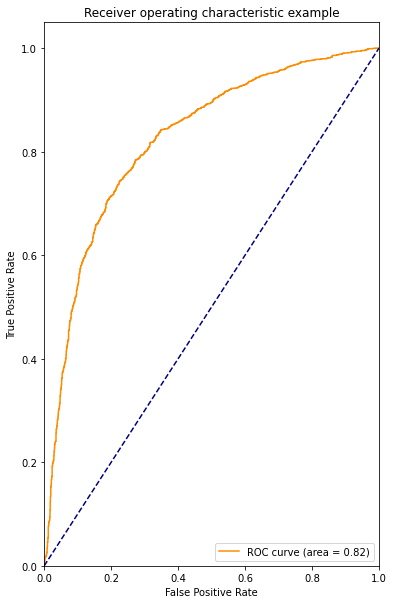


ROC Score:
0.8228364525885679


In [18]:
show_evaluation(y_test, y_pred, y_prob)